##Building a Custom Loss Function in TensorFlow

Use the functional API to build a custom `Huber Loss` function and run it an a very basic neural net

In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Input
import numpy as np
from tensorflow.keras.utils import plot_model 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

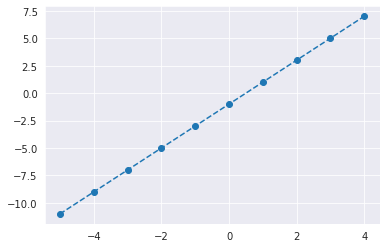

In [2]:
xs = np.arange(-5,5,1).astype('float32')
ys = xs * 2 - 1
plt.plot(xs, ys, 'o--')

##Model using MSE loss

In [5]:
input = Input(shape=(1,), name='input_layer')
output_layer = Dense(1, name='output_layer')(input)
model_mse_loss = tf.keras.models.Model(inputs=input, outputs=output_layer)
model_mse_loss.compile(optimizer='sgd', loss='mse')
model_mse_loss.fit(xs, ys, epochs=500, verbose=0)
model_mse_loss.predict([10.0])

array([[19.000092]], dtype=float32)

Use `get_weights()` method to save weights for future model 

In [6]:
model_mse_loss.get_weights() 

[array([[2.0000038]], dtype=float32), array([-0.9999458], dtype=float32)]

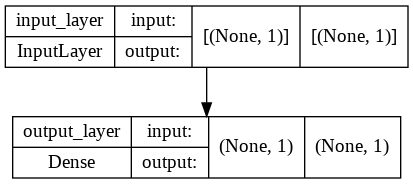

In [7]:
plot_model(model_mse_loss, to_file='mse_loss_model.png', show_layer_names=True, show_shapes=True)

##Define Custom Huber Loss Function 

In [10]:
def huber_loss(y_true, y_pred):
  threshold = 1
  error = y_true - y_pred
  return_type = tf.abs(error) <= threshold 
  r1 = 0.5 * tf.square(error)
  r2 = threshold * (tf.abs(error) - (0.5 * threshold))
  return tf.where(return_type, r1, r2)

In [11]:
input = Input(shape=(1,), name='input_layer')
output_layer = Dense(1, name='output_layer')(input)
model_huber_loss = tf.keras.models.Model(inputs=input, outputs=output_layer)
model_huber_loss.compile(optimizer='sgd', loss='huber_loss')
model_huber_loss.fit(xs, ys, epochs=500, verbose=0)
model_huber_loss.predict([10.0])

array([[19.033133]], dtype=float32)

In [15]:
model_huber_loss.get_weights()

[array([[2.0013218]], dtype=float32), array([-0.98008454], dtype=float32)]